# Individual Planning Report

**Name:** Flora Suh 

**GitHub Repo Link:** 



# (1) Data Description:


In [5]:
install.packages("tidyverse")  
library(tidyverse)
library(dplyr)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



ERROR: Error in librray(ggplot2): could not find function "librray"


In [ ]:
players <- read_csv("https://raw.githubusercontent.com/Florasuh/individual_project_planning_report/main/players.csv")

players

## General Overview

Number of observations (rows): 150

Number of variables (columns): 7

Purpose: Contains information about players’ experience, subscription status, email, hours played, name, gener, and age.

Unit of observation: Each row represents a unique player.

Data Collection: A MineCraft server Links to an external site, and players' actions are recorded as they navigate through the world.



## Variable Descriptions:

In [29]:

variable_descriptions <- tibble(
    Variable = c("experience", "subscribe", "hashedEmail", "played_hours", "name", "gender", "age"),
    Type = c("Chr", "lgl", "Chr", "dbl", "Chr", "Chr", "dbl"),
    Description = c("Represents the player’s skill level (Beginner, Amateur, Regular, Veteran, Pro).",
                    "Indicates whether the player has an active subscription (TRUE for subscribed, FALSE for not).",
                    "Unique hashed identifier for each player’s email address.",
                    "Total hours each player has spent playing.",
                    "Player’s first name.",
                    "Player’s gender identity (Male, Female, Non-binary, Two-Spirited, Agender, Prefer not to say, Other).",
                    "Player’s age in years."),
  Notes_and_Issues = c("Subjective, could be treated as an ordered variable, some categories may be underrepresented.",
                       "More subscribed players than unsubscribed.",
                       "May not be useful.",
                       "Extreme outliers (up to 223 hours), some players have values near zero.",
                       "Not useful for quantitative analysis.",
                       "Possible inconsistencies or missing entries.",
                       "Ranges from 9 to 58 years old, with a few missing values."))

variable_descriptions


Variable,Type,Description,Notes_and_Issues
<chr>,<chr>,<chr>,<chr>
experience,Chr,"Represents the player’s skill level (Beginner, Amateur, Regular, Veteran, Pro).","Subjective, could be treated as an ordered variable, some categories may be underrepresented."
subscribe,lgl,"Indicates whether the player has an active subscription (TRUE for subscribed, FALSE for not).",More subscribed players than unsubscribed.
hashedEmail,Chr,Unique hashed identifier for each player’s email address.,May not be useful.
played_hours,dbl,Total hours each player has spent playing.,"Extreme outliers (up to 223 hours), some players have values near zero."
name,Chr,Player’s first name.,Not useful for quantitative analysis.
gender,Chr,"Player’s gender identity (Male, Female, Non-binary, Two-Spirited, Agender, Prefer not to say, Other).",Possible inconsistencies or missing entries.
age,dbl,Player’s age in years.,"Ranges from 9 to 58 years old, with a few missing values."


## Summary Statistics: ##

In [19]:
hours <- players |>
summarize(mean_hours = mean(played_hours, na.rm = TRUE),
          max_hours  = max(played_hours, na.rm = TRUE),
          min_hours  = min(played_hours, na.rm = TRUE))


hours

mean_hours,max_hours,min_hours
<dbl>,<dbl>,<dbl>
5.845918,223.1,0


In [18]:
age <- players |>
summarize(mean_age = mean(Age, na.rm = TRUE),
          max_age  = max(Age, na.rm = TRUE),
          min_age  = min(Age, na.rm = TRUE))

age

mean_age,max_age,min_age
<dbl>,<dbl>,<dbl>
21.13918,58,9


## Potential Issues:
- Missing Data: Some missing values in Age and possibly gender.
- Outliers: Extreme values in played_hours
- Data Imbalances
- Self-report bias

In [ ]:
players <- read_csv("https://raw.githubusercontent.com/Florasuh/individual_project_planning_report/main/players.csv")

players

In [ ]:
I decided to look into the players.csv file, which includes a list of all unique players, including data about each player:

# (2) Questions:

The broad question I chose was: 

Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

My Specific Question: 
Can a players' age and the number of hours played accurately predict the subscription status in the player.csv dataset?

How data will help answer my question / plan:
The player.csv dataset contains information about age and total hours played. The dataset also includes a variable indicating whether the player has subscribed to the game-related newsletter. This will make it easier to examine relationships between player characteristics and subscription behavior. By analyzing these variables, pattern can be identified and a knn-model can be built to classify if a player subscribes.


# (3) Exploratory Data Analysis and Visualization



Make a few exploratory visualizations of the data to help you understand it. Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)

Explain any insights you gain from these plots that are relevant to address your question

In [8]:
players <- read_csv("https://raw.githubusercontent.com/Florasuh/individual_project_planning_report/main/players.csv")

players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [9]:
# tidy data:
players <- players |>
    mutate(played_hours = as.numeric(played_hours),
           Age = as.numeric(Age),
           experience = as.factor(experience),
           subscribe = as.logical(subscribe),
           gender = as.factor(gender))
players
# The data was already in tidy format. Each Variable is one column, each observation is one row, and each value is in once cell.
# Just the data type was wrangled.

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


## Analysis:


In [9]:
# mean value for quantitatve variables
mean_table <- players |>
    select(played_hours, Age) |>
    summarise(across(everything(), mean, na.rm = TRUE))
mean_table

Warning message:
“There was 1 warning in `summarise()`.
ℹ In argument: `across(everything(), mean, na.rm = TRUE)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


## Visualizations:

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


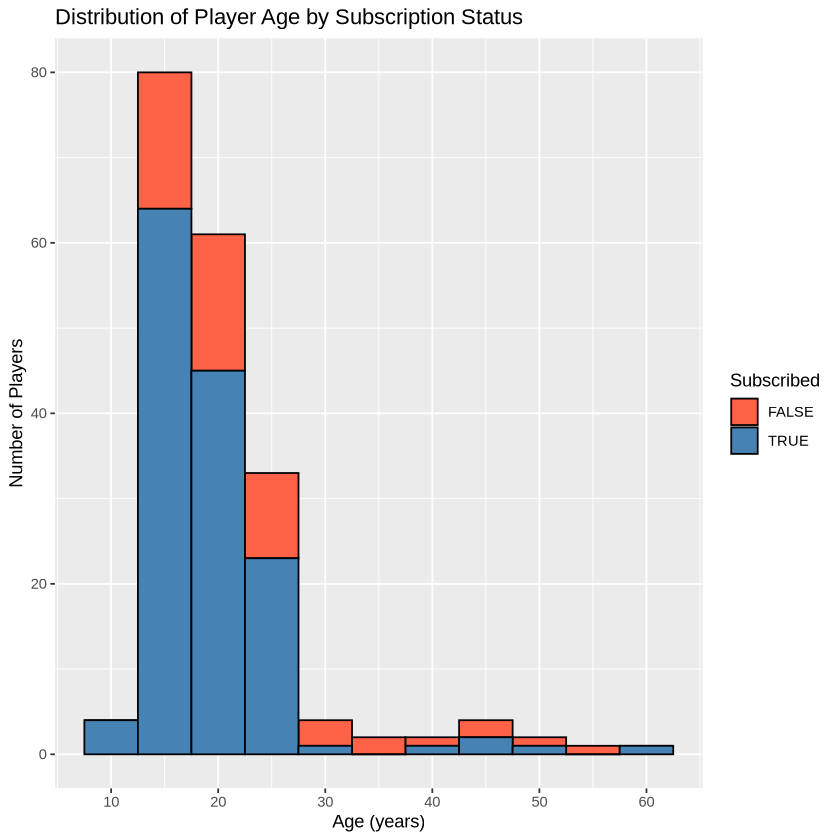

In [16]:
# histogram of age by subscription status

age_vs_subscription_status <- ggplot(players, aes(x = Age, fill = subscribe)) +
    geom_histogram(binwidth = 5, position = "stack", color = "black") +
    scale_fill_manual(values = c("FALSE" = "tomato", "TRUE" = "steelblue")) +
    scale_x_continuous(breaks = seq(0, 60, by = 10)) +
    labs(title = "Distribution of Player Age by Subscription Status",
         x = "Age (years)",
         y = "Number of Players",
         fill = "Subscribed") 
age_vs_subscription_status



The plot helps you quickly see if certain age groups are more likely to subscribe based on the ratio of subscribed and unsubscried for each age category. Players in under30 are most likely to subscribe, while the least likley age group is the mid 30s.

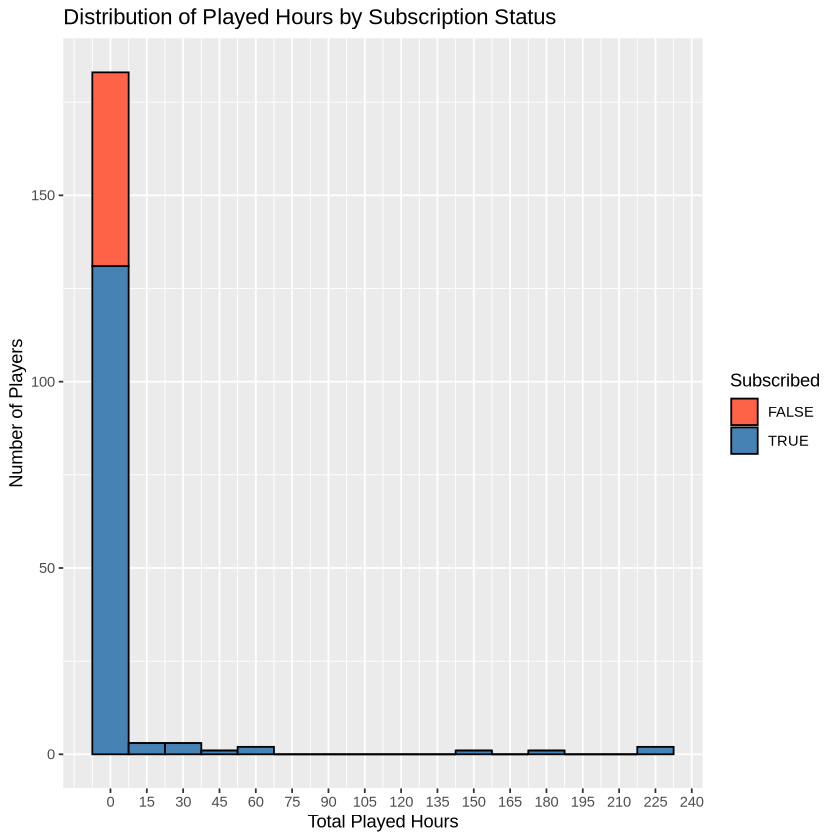

In [21]:
# histogram of played_hours vs subscription status
played_hours_vs_subscription_status <- ggplot(players, aes(x = played_hours, fill = subscribe)) +
    geom_histogram(binwidth = 15, position = "stack", color = "black") +
    scale_fill_manual(values = c("FALSE" = "tomato", "TRUE" = "steelblue")) +
    scale_x_continuous(breaks = seq(0, 250, by = 15)) +
    labs(title = "Distribution of Played Hours by Subscription Status",
         x = "Total Played Hours",
         y = "Number of Players",
         fill = "Subscribed") 
played_hours_vs_subscription_status

The visualization shows that the majority of players spend relatively few hours in the game, with the distribution heavily skewed to the left. However, players who have subscribed to the newsletter tend to appear more frequently as the total number of hours played increases, suggesting that more engaged players are more likely to subscribe. 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


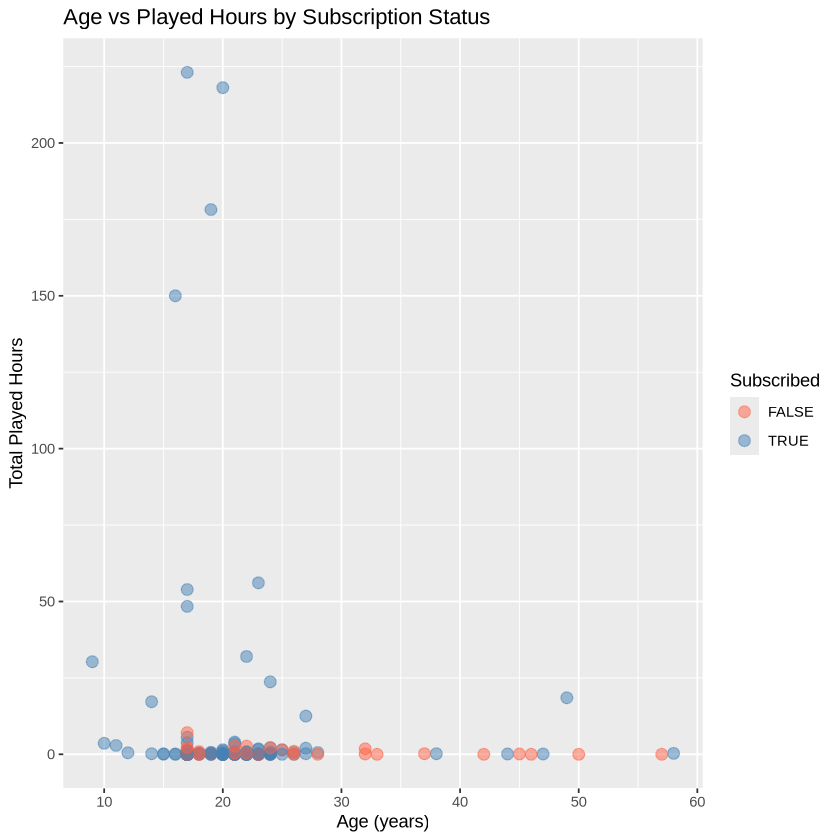

In [28]:
# Scatterplot of Age vs. Played Hours Colored by Subscription
age_vs_played_hours <- ggplot(players, aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point(alpha = 0.5, size = 3) +
  scale_color_manual(values = c("FALSE" = "tomato", "TRUE" = "steelblue")) +
  labs(title = "Age vs Played Hours by Subscription Status",
       x = "Age (years)",
       y = "Total Played Hours",
       color = "Subscribed")
age_vs_played_hours

The scatterplot shows the relationship between Age and Played Hours while highlighting subscription status with color, helping us identify patterns or separations between subscribers and non-subscribers. The scatterplot shows that there isn’t a clear linear relationship between age and hours played, but players who subscribe tend to have higher played hours.

# (4) Methods and Plan

To address my question of whether a player’s age and total hours played can predict their subscription status, I plan to use a K-Nearest Neighbors classification model on the players dataset. Since the predictors (Age and Played Hours) are continuous, and the class label (subscription) is categorical, the KNN model will work well as it can capture non-linear relationships without assumptions and can assign a class based on majority vote. KNN assumes that similar players are likely to share similar outcomes, so the nearest points are used to classify an unknown subscription status. Some potential limitations include scaling, as the data has to be properly standardized for outliers and the two variables have to be properly scaled for accurate results, as well as using a large database which can make KNN slower and time-consuming. I am going to compare models using accuracy, precision, and recall to see which leads to the best results, and then evaluate performance across k values using cross-validation and select the best k value.


Data Processing Plan:

- I will first divide the dataset into a training set(75%) and a test set(25%), making sure to set the seed for reproducibility.

- Both Age and Played Hours will be standardized in a recipe before fitting the model to ensure fair distance calculations.

- Within the training data, I will apply 5-fold cross-validation to tune k and find the best k value from the filtered workflow.

- Then, I will retrain and fit the model using the best k, and the final model's accuracy, precision, and recall will be evaluated using the testing data.